# COVID-19 CASES in PA #
Data Source: https://www.health.pa.gov/topics/disease/coronavirus/Pages/Archives.aspx

In [52]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

In [53]:
# Web Scraped Data from PA Department of Health
df = pd.read_csv("pa_summary.csv")
df.head(5)

,Date,Negative,Positive,Deaths
0,2020-03-31,37645,4843,63
1,2020-03-30,33777,4087,48
2,2020-03-29,30061,3394,38
3,2020-03-28,25254,2751,34
4,2020-03-27,21016,2218,22


### Assume Sum of Positive and Negative as Total Tested Population

In [54]:
# Sum of Positive and Negative as Total Tested Population
df['Tested'] = df['Positive'] + df['Negative']
df['Positive_Percent'] = 100*df['Positive']/df['Tested']
df['Negative_Percent'] = 100*df['Negative']/ df['Tested']
df['Death_Percent'] = 100*df['Deaths']/ df['Tested']
df.head(5)

,Date,Negative,Positive,Deaths,Tested,Positive_Percent,Negative_Percent,Death_Percent
0,2020-03-31,37645,4843,63,42488,11.398513,88.601487,0.148277
1,2020-03-30,33777,4087,48,37864,10.793894,89.206106,0.126769
2,2020-03-29,30061,3394,38,33455,10.144971,89.855029,0.113585
3,2020-03-28,25254,2751,34,28005,9.823246,90.176754,0.121407
4,2020-03-27,21016,2218,22,23234,9.546354,90.453646,0.094689


In [55]:
df = df.sort_values('Date', ascending = True).reset_index(drop=True)
df.head(5)

,Date,Negative,Positive,Deaths,Tested,Positive_Percent,Negative_Percent,Death_Percent
0,2020-03-18,1187,133,0,1320,10.075758,89.924242,0.000000
1,2020-03-19,1608,185,0,1793,10.317903,89.682097,0.000000
2,2020-03-20,2574,268,0,2842,9.429979,90.570021,0.000000
3,2020-03-21,3766,371,2,4137,8.967851,91.032149,0.048344
4,2020-03-22,4964,479,2,5443,8.800294,91.199706,0.036744


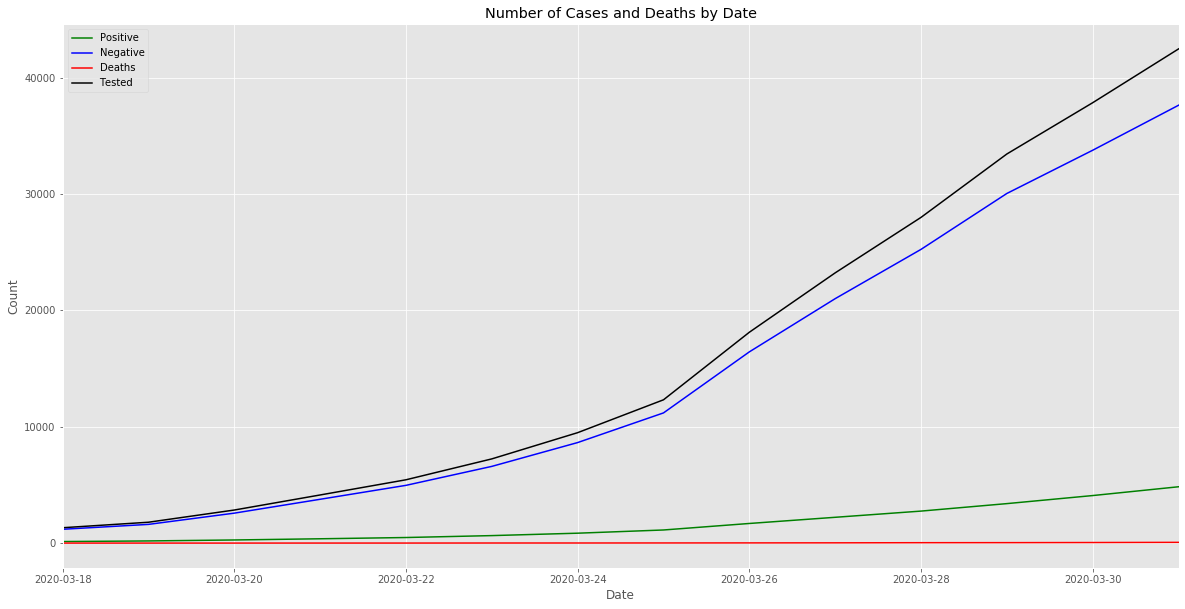

In [56]:
style.use('ggplot')
ax = plt.gca()
df.plot(kind='line',x='Date',y='Positive', color='green', ax=ax, figsize=(20,10))
df.plot(kind='line',x='Date',y='Negative', color='blue', ax=ax)
df.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax)
df.plot(kind='line',x='Date',y='Tested', color='black', ax=ax)
plt.title('Number of Cases and Deaths by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [57]:
df_percent = pd.DataFrame(df, columns=['Date', 'Positive_Percent','Negative_Percent'])
df_percent.set_index("Date", inplace = True) 
df_percent.head(5)

,Positive_Percent,Negative_Percent
Date,,
2020-03-18,10.075758,89.924242
2020-03-19,10.317903,89.682097
2020-03-20,9.429979,90.570021
2020-03-21,8.967851,91.032149
2020-03-22,8.800294,91.199706


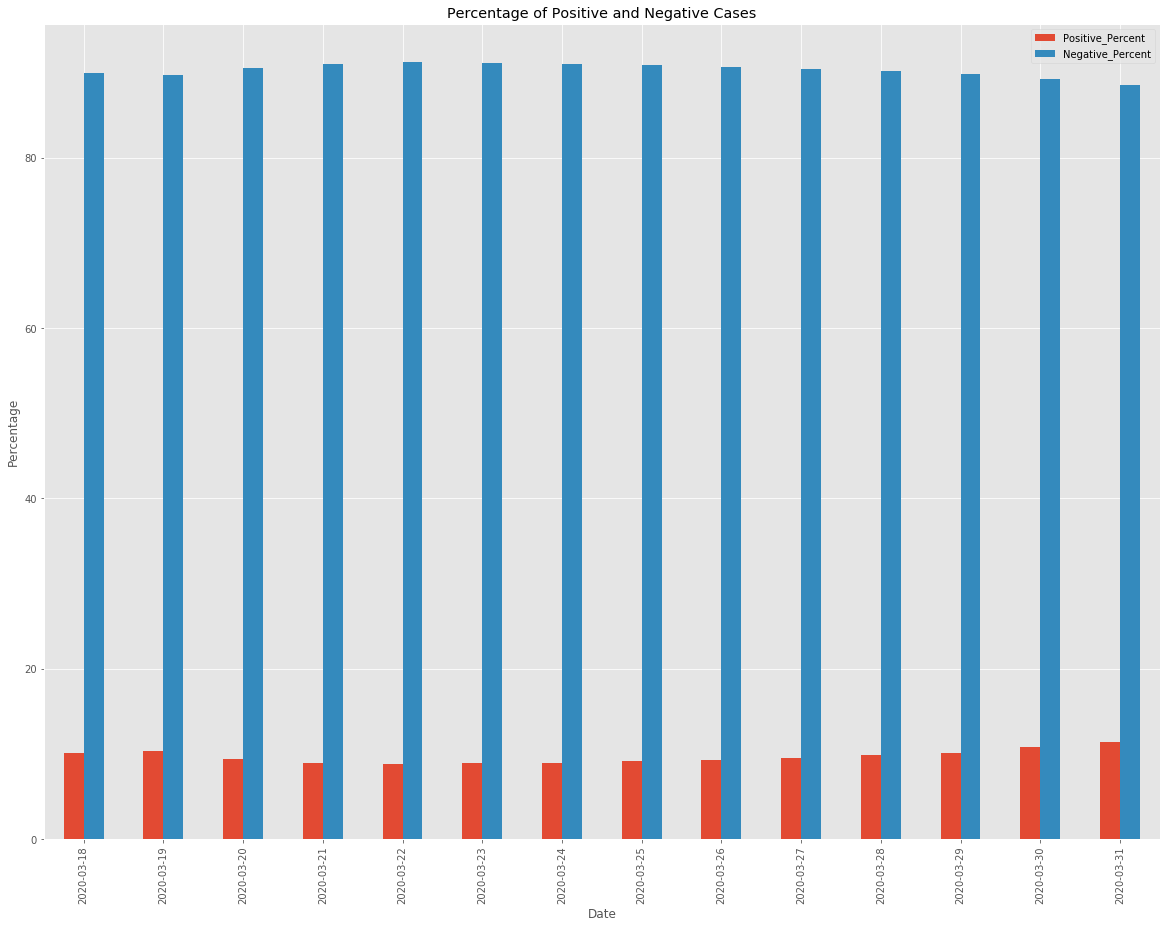

In [58]:
style.use('ggplot')
df_percent.plot.bar(stacked=False, figsize=(20,15), title="Percentage of Positive and Negative Cases")
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show()

## Deeper Dive into Cases By County

In [59]:
# Web Scraped Data from PA Department of Health
df_county = pd.read_csv("pa_county.csv")
df_county.head()

,Date,County,Cases,Deaths
0,2020-03-31,Adams,9,0
1,2020-03-31,Allegheny,325,2
2,2020-03-31,Armstrong,5,0
3,2020-03-31,Beaver,52,1
4,2020-03-31,Bedford,2,0


In [60]:
df_counties = df_county.sort_values('Date', ascending = True).reset_index(drop=True)
df_counties.head(10)

,Date,County,Cases,Deaths
0,2020-03-18,York,2,0
1,2020-03-18,Allegheny,11,0
2,2020-03-18,Beaver,2,0
3,2020-03-18,Berks,1,0
4,2020-03-18,Bucks,9,0
5,2020-03-18,Chester,9,0
6,2020-03-18,Cumberland,10,0
7,2020-03-18,Delaware,14,0
8,2020-03-18,Lackawanna,1,0
9,2020-03-18,Wayne,1,0


In [61]:
county_name = 'Chester'
df_county = df_county[df_county['County']== county_name]
df_county

,Date,County,Cases,Deaths
14,2020-03-31,Chester,159,1
73,2020-03-30,Chester,146,0
132,2020-03-29,Chester,137,0
190,2020-03-28,Chester,116,0
245,2020-03-27,Chester,107,0
295,2020-03-26,Chester,84,0
342,2020-03-25,Chester,54,0
386,2020-03-24,Chester,40,0
423,2020-03-23,Chester,40,0
456,2020-03-22,Chester,23,0


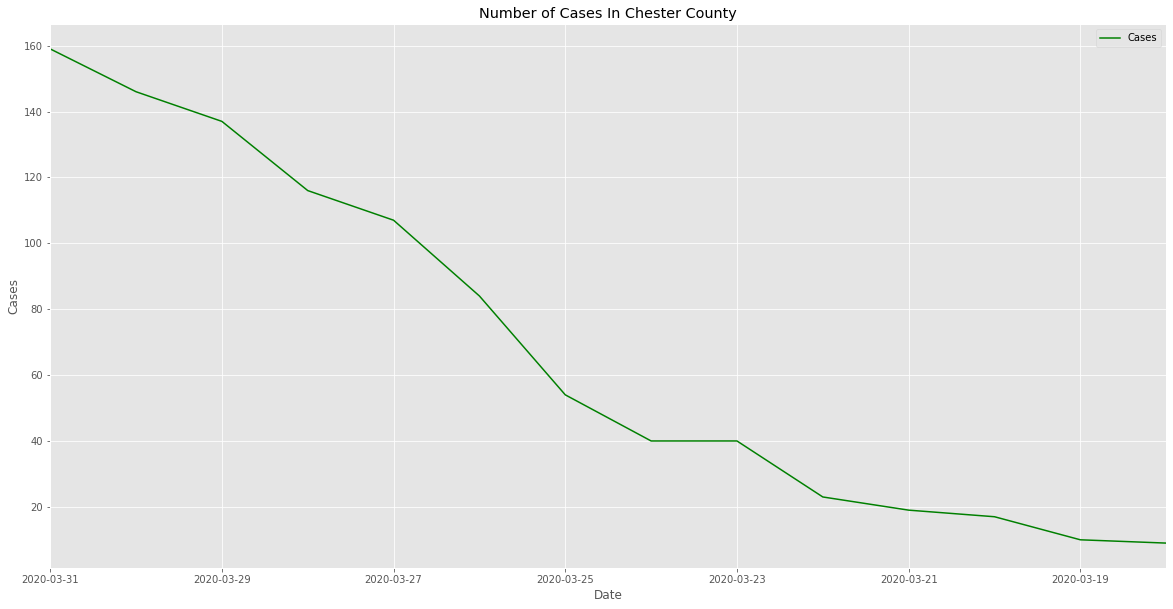

In [62]:
style.use('ggplot')
ax = plt.gca()
df_county.plot(kind='line',x='Date',y='Cases', color='green', ax=ax, figsize=(20,10))
plt.title('Number of Cases In ' + county_name +' County')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()